<a href="https://colab.research.google.com/github/Nickolay212/Text/blob/main/HW17_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten, \
              SpatialDropout1D, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import utils  

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



Используйте разбиение текстов на фрагменты на базе обращения граждан в органы власти, например, размер блока - 20 слов, шаг - 1 слово.

Напишите функцию распознавания нужного обращения разделением его на фрагменты и распознаванием фрагментов.

Попробуйте разные параметры фильтрации выборки. Добавьте какой-нибудь свой критерий для фильтрации.



# Анализ и модели с урока

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/HW17/clean_data.csv')

In [ ]:
base = base.iloc[:,:2]
base

,text,category
0,Здравствуйте. Подскажите пожалуйста можно ли с...,Дороги и транспорт
1,Подскажите пожалуйста имеют ли право не платит...,ЖКХ
2,""" Спасибо Вам огромное за возобновление строит...",Строительство
3,Проблема одна и общая стала в городе. Спорт. у...,Спорт
4,Некоторое время назад для школьников и студент...,Дороги и транспорт
...,...,...
10054,Единственная асфальтированная дорога в п. Заре...,Благо­­устрой­­ство
10055,УВАЖАЕМЫЙ ИГОРЬ ГЕОРГИЕВИЧ! В ПОСЕЛКЕ ЛЕВ ТОЛС...,Борьба с коррупцией
10056,Здравствуйте! 19 июня 2019 года затопило магаз...,ЖКХ
10057,Уважаемый! Помогите пожалуйста решить проблему...,ЖКХ


In [ ]:
base[base.category == 'Строительство']
base.iloc[46].tolist()

['Добрый день! Предлагаю создать страницу в интернете, на которой будет регулярно публиковаться информация о проблемных стройках города. Пока за решением проблем дольшиков можно наблюдать в материалах новостных СМИ, да и то не о всех. (например, мало информации о застройщике ЛИСК и его проблемах). Это может быть страница в соцсети, отдельный сайт, либо раздел на этом ресурсе, где каждый дольщик мог бы мониторить информацию по своему дому. Это было бы очень удобно!',
 'Строительство']

In [ ]:
for cl in base['category'].unique():
  print('Количество записей класса ', cl, ': ', base[base['category'] == cl].shape[0])

Количество записей класса  Дороги и транспорт :  1411
Количество записей класса  ЖКХ :  2063
Количество записей класса  Строительство :  349
Количество записей класса  Спорт :  246
Количество записей класса  Благо­­устрой­­ство :  1686
Количество записей класса  Образование и наука :  290
Количество записей класса  Культура :  100
Количество записей класса  Демография :  20
Количество записей класса  Социальная сфера :  370
Количество записей класса  Другое :  208
Количество записей класса  Бизнес :  187
Количество записей класса  Здравоохранение :  368
Количество записей класса  Органы власти :  244
Количество записей класса  Экология :  180
Количество записей класса  Правопорядок :  172
Количество записей класса  Труд и занятость населения :  151
Количество записей класса  Борьба с коррупцией :  59
Количество записей класса  Промышленность :  13
Количество записей класса  Сельское хозяйство :  50
Количество записей класса  Земельные отношения :  80
Количество записей класса  Туризм :

In [ ]:
base.text[46]

'Добрый день! Предлагаю создать страницу в интернете, на которой будет регулярно публиковаться информация о проблемных стройках города. Пока за решением проблем дольшиков можно наблюдать в материалах новостных СМИ, да и то не о всех. (например, мало информации о застройщике ЛИСК и его проблемах). Это может быть страница в соцсети, отдельный сайт, либо раздел на этом ресурсе, где каждый дольщик мог бы мониторить информацию по своему дому. Это было бы очень удобно!'

Так как данные приведены с неполные (nan, где то 2000, где то 100 примеров), нейронка не справится с задачей.
Потому необходимо отфильтровать выборку.

In [ ]:
maxCounts = 400
minCounts = 300
base = base.dropna().reset_index()

for cl in base.category.unique():
  init = base[base.category == cl].shape[0]
  if base[base.category == cl].shape[0] < minCounts:
    base.drop(base[base.category == cl].index, inplace=True)
  if base[base.category == cl].shape[0] > maxCounts:
    base.drop(base[base.category == cl].index[maxCounts:], inplace=True)
  print('Количество записей класса ', cl, ': ', init, '. В выборку вошло: ', base[base.category == cl].shape[0], sep='')
base = base.reset_index() 

Количество записей класса Дороги и транспорт: 1411. В выборку вошло: 400
Количество записей класса ЖКХ: 2063. В выборку вошло: 400
Количество записей класса Строительство: 349. В выборку вошло: 349
Количество записей класса Спорт: 246. В выборку вошло: 0
Количество записей класса Благо­­устрой­­ство: 1686. В выборку вошло: 400
Количество записей класса Образование и наука: 290. В выборку вошло: 0
Количество записей класса Культура: 100. В выборку вошло: 0
Количество записей класса Демография: 20. В выборку вошло: 0
Количество записей класса Социальная сфера: 370. В выборку вошло: 370
Количество записей класса Другое: 208. В выборку вошло: 0
Количество записей класса Бизнес: 187. В выборку вошло: 0
Количество записей класса Здравоохранение: 368. В выборку вошло: 368
Количество записей класса Органы власти: 244. В выборку вошло: 0
Количество записей класса Экология: 180. В выборку вошло: 0
Количество записей класса Правопорядок: 172. В выборку вошло: 0
Количество записей класса Труд и за

In [ ]:
texts = base.text.values  
Classe = list(base.category.values)
maxWordscount = 1000
nClasse = base.category.nunique()+1
list_pro2 = []
texts

array(['Здравствуйте. Подскажите пожалуйста можно ли сделать проезд для школьников по льготной цене. Для людей работающих в бюджетной организации, с детьми на проезд уходит значительная часть денег на оплату проезда .',
       'Подскажите пожалуйста имеют ли право не платить какп ремонт',
       '" Спасибо Вам огромное за возобновление строительства микрорайона Европейский. Есть ли вероятность получения неустойки за срыв срока сдачи дома # 10 ? ? Имеется решение суда и соответственно исполнительный лист. Спасибо за внимание. "',
       ...,
       'Почему на сайте недоступна информация по дому - уже три дня ?',
       'Здравствуйте. В настоящее время оклад медсестры в государственной стоматологии — 9000 руб. Если есть доплата за интенсивность (работа с несколькими врачами и т. д.), то прибавляется еще 5 - 6 тыс. руб. Смысла работать в гос. учереждении нет, т. к. при том же графике в частной клинике доход в раза больше. Государственная медицина теряет нормальных специалистов .',
       

## Для Dense - Bag_of_words - массив по возрастанию из 0 

In [ ]:
token = Tokenizer(num_words = maxWordscount, \
                  filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', oov_token = 'unknown')
token.fit_on_texts(texts)
#Данные
xAll = token.texts_to_matrix(texts)
xAll.shape

(2287, 1000)

In [ ]:
encoder = LabelEncoder()
encoder.fit(Classe)
classesEnc = encoder.transform(Classe)
print(classesEnc.max())
#Классы
yAll = utils.to_categorical(classesEnc, nClasse)
yAll.shape

5


(2287, 7)

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(xAll, yAll, test_size = 0.2, shuffle = True)
print(xtrain.shape, xval.shape, ytrain.shape, yval.shape)

(1829, 1000) (458, 1000) (1829, 7) (458, 7)


Epoch 1/17
15/15 [==============================] - 1s 14ms/step - loss: 2.1182 - accuracy: 0.2596 - val_loss: 1.5967 - val_accuracy: 0.5306
Epoch 2/17
15/15 [==============================] - 0s 5ms/step - loss: 0.9368 - accuracy: 0.6882 - val_loss: 1.4363 - val_accuracy: 0.6135
Epoch 3/17
15/15 [==============================] - 0s 5ms/step - loss: 0.5861 - accuracy: 0.8250 - val_loss: 1.3622 - val_accuracy: 0.6376
Epoch 4/17
15/15 [==============================] - 0s 5ms/step - loss: 0.4200 - accuracy: 0.8878 - val_loss: 1.3043 - val_accuracy: 0.6594
Epoch 5/17
15/15 [==============================] - 0s 5ms/step - loss: 0.2944 - accuracy: 0.9350 - val_loss: 1.2564 - val_accuracy: 0.6790
Epoch 6/17
15/15 [==============================] - 0s 5ms/step - loss: 0.2342 - accuracy: 0.9550 - val_loss: 1.2167 - val_accuracy: 0.6790
Epoch 7/17
15/15 [==============================] - 0s 5ms/step - loss: 0.1696 - accuracy: 0.9717 - val_loss: 1.1801 - val_accuracy: 0.6790
Epoch 8/17
15/15 [=

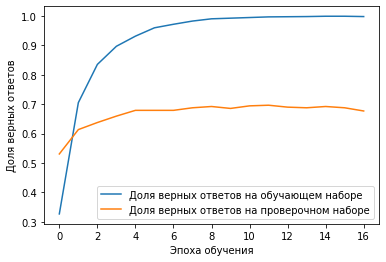

In [ ]:
def model_():
  #Создаём полносвязную сеть
  model01 = Sequential()
  #Первый полносвязный слой
  model01.add(Dense(200, input_dim=maxWordscount, activation="relu"))
  #Слой регуляризации Dropout
  model01.add(Dropout(0.25))
  #Слой пакетной нормализации
  model01.add(BatchNormalization())
  #Выходной полносвязный слой
  model01.add(Dense(7, activation='softmax'))

  model01.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model01

model = model_()
#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
# print('*'*60)
# print(, ' ||')
# print('-'*15)
history = model.fit(xtrain, 
                      ytrain, 
                      epochs=17,
                      batch_size=128,
                      validation_data=(xval, yval))

plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')
list_pro2 += [['model_lesson', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]

## Для embedding - to_sequens - перечень текста по номерам повтор слов

In [ ]:
xAllE = token.texts_to_sequences(texts)
xAllE = np.array(xAllE)
xtrainE, xvalE, ytrainE, yvalE = train_test_split(xAllE, yAll, test_size = 0.2, shuffle = True)
print(xtrainE.shape, xvalE.shape, ytrainE.shape, yvalE.shape)

(1829,) (458,) (1829, 7) (458, 7)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


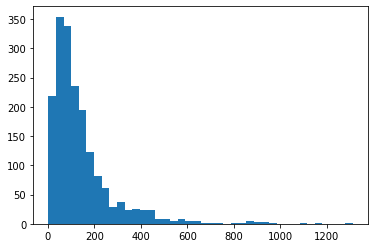

In [ ]:
lenxtr = [len(x) for x in xtrainE]
plt.hist(lenxtr, 40)
plt.show()

Epoch 1/30
29/29 [==============================] - 1s 13ms/step - loss: 2.5336 - accuracy: 0.1785 - val_loss: 1.9021 - val_accuracy: 0.1703
Epoch 2/30
29/29 [==============================] - 0s 7ms/step - loss: 1.7519 - accuracy: 0.2966 - val_loss: 1.8979 - val_accuracy: 0.1834
Epoch 3/30
29/29 [==============================] - 0s 7ms/step - loss: 1.1789 - accuracy: 0.5757 - val_loss: 1.9173 - val_accuracy: 0.1834
Epoch 4/30
29/29 [==============================] - 0s 7ms/step - loss: 0.5341 - accuracy: 0.8565 - val_loss: 1.8911 - val_accuracy: 0.1834
Epoch 5/30
29/29 [==============================] - 0s 7ms/step - loss: 0.2963 - accuracy: 0.9389 - val_loss: 1.8726 - val_accuracy: 0.1834
Epoch 6/30
29/29 [==============================] - 0s 8ms/step - loss: 0.1634 - accuracy: 0.9811 - val_loss: 1.8620 - val_accuracy: 0.1900
Epoch 7/30
29/29 [==============================] - 0s 7ms/step - loss: 0.1123 - accuracy: 0.9868 - val_loss: 1.8656 - val_accuracy: 0.1856
Epoch 8/30
29/29 [=

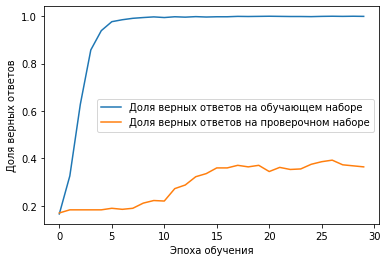

In [ ]:
maxlen = 300
XtrainE = pad_sequences(xtrainE, maxlen = maxlen)
XvalE = pad_sequences(xvalE, maxlen = maxlen)

def model_():
    modelE = Sequential()
    modelE.add(Embedding(maxWordscount, 50, input_length=maxlen))
    modelE.add(SpatialDropout1D(0.2))
    modelE.add(Flatten())
    modelE.add(BatchNormalization())
    modelE.add(Dense(64, activation="relu"))
    modelE.add(Dropout(0.2))
    modelE.add(BatchNormalization())
    modelE.add(Dense(7, activation='softmax'))

    modelE.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return modelE
model = model_()
#Обучаем сеть на выборке, сформированной по bag of words - xTrain01
# print('*'*60)
# print(tt, ' ||')
# print('-'*15)
history = model.fit(XtrainE, 
                      ytrainE, 
                      epochs=30,
                      batch_size=64,
                      validation_data=(XvalE, yvalE))
list_pro2 += [['model_lesson_E', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]
plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')

# Анализ модели


!!!! Обращения граждан идет в разнобой, поэтому переделал слегка генерирование примеров, с помощью encoder

In [ ]:
texts = base.text.values  
Classe = list(base.category.values)
nClasse = base.category.nunique()+1

In [ ]:
encoder = LabelEncoder()
encoder.fit(Classe)
classesEnc = encoder.transform(Classe)
print(list(encoder.classes_))
print(classesEnc.shape)
print(classesEnc[:10])
print(Classe[:10])

['Благо\xad\xadустрой\xad\xadство', 'Дороги и транспорт', 'ЖКХ', 'Здравоохранение', 'Социальная сфера', 'Строительство']
(2287,)
[1 2 5 1 1 1 1 0 1 1]
['Дороги и транспорт', 'ЖКХ', 'Строительство', 'Дороги и транспорт', 'Дороги и транспорт', 'Дороги и транспорт', 'Дороги и транспорт', 'Благо\xad\xadустрой\xad\xadство', 'Дороги и транспорт', 'Дороги и транспорт']


In [ ]:
classesEnc.shape[0]

2287

In [ ]:
MaxWordsCount = 1000
xlen = 20 #Длина отрезка текста, по которой анализируем, в словах
step = 1 #Шаг разбиения исходного текста на обучающие векторы
arxiv = []

#I
tokenizer = Tokenizer(num_words=MaxWordsCount, oov_token = 'unknown', char_level = False)

#II
# "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
tokenizer.fit_on_texts(texts)
#III
trainIndex1 = tokenizer.texts_to_sequences(texts)
# XtrainIndex1, XvalIndex1, YtrainEnc, YvalEnc = train_test_split(trainIndex1, classesEnc, test_size = 0.2, shuffle = True)

#IV
def getsetfromInd(wordIndex,xlen,step): # Функция принимает последовательность индексов, размер окна, шаг окна
  xSample = []
  wordlen = len(wordIndex)
  index = 0
  while (index + xlen <= wordlen):
    xSample.append(wordIndex[index:index+xlen])
    index += step
  return xSample
def createSet(wordIndex,xlen,step,classesEnc):
  nClasses = classesEnc.max()+1                                     #!!!labelencoder 6
  
  classX = [] 
  for wi in wordIndex: 
    classX.append(getsetfromInd(wi,xlen,step))                      #!!!все знач по классам
  xSamples = []
  ySamples = []
  for i in range(classesEnc.shape[0]): #2287
    xT = classX[i]
    for t in range(len(xT)):
      xSamples.append(xT[t])                             
      ySamples.append(utils.to_categorical(classesEnc[i], nClasses))
  xSamples = np.array(xSamples) # Переводим в массив numpy для подачи в нейронку
  ySamples = np.array(ySamples) # Переводим в массив numpy для подачи в нейронку
  return (xSamples, ySamples) #Функция возвращает выборку и соответствующие векторы классов
#IV
xtrain1, ytrain1 = createSet(trainIndex1,xlen,step,classesEnc)

#V
#Bag of words
xtrain01 = tokenizer.sequences_to_matrix(xtrain1.tolist())

xtrain_, xval_, ytrain_, yval_ = train_test_split(xtrain01, ytrain1, train_size = 0.2, shuffle = True)
xtrain_E, xval_E, ytrain_E, yval_E = train_test_split(xtrain1, ytrain1, train_size = 0.2, shuffle = True)


In [ ]:
#--------------------------------------------------------------------------------------------------
def model_():
  #Создаём полносвязную сеть
  model01 = Sequential()
  #Первый полносвязный слой
  model01.add(Dense(200, input_dim=MaxWordsCount, activation="relu"))
  #Слой регуляризации Dropout
  model01.add(Dropout(0.25))
  #Слой пакетной нормализации
  model01.add(BatchNormalization())
  #Выходной полносвязный слой
  model01.add(Dense(6, activation='sigmoid'))

  model01.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model01
model = model_()
history = model.fit(xtrain_, ytrain_, 
                      epochs=10,
                      batch_size=64,
                      validation_data= (xval_,yval_))
list_pro2 += [['model_HW', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]
plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')

#--------------------------------------------------------------------------------------------------
def model_22():
  #Создаём полносвязную сеть
  model01 = Sequential()
  #Первый полносвязный слой
  model01.add(Dense(324, input_dim=MaxWordsCount, activation="relu"))
  #Слой регуляризации Dropout
  model01.add(Dropout(0.25))
  #Слой пакетной нормализации
  model01.add(BatchNormalization())
  model01.add(Dense(96, input_dim=MaxWordsCount, activation="relu"))
  #Слой регуляризации Dropout
  model01.add(Dropout(0.2))
  #Слой пакетной нормализации
  model01.add(BatchNormalization())
  #Слой пакетной нормализации
  model01.add(BatchNormalization())
  #Выходной полносвязный слой
  model01.add(Dense(6, activation='sigmoid'))

  model01.compile(optimizer='nadam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model01
model = model_22()
history = model.fit(xtrain_, ytrain_, 
                      epochs=15,
                      batch_size=64,
                      validation_data= (xval_,yval_))
list_pro2 += [['model_HW_twolayers', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]
plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')

Epoch 1/10
897/897 [==============================] - 10s 11ms/step - loss: 1.8709 - accuracy: 0.2858 - val_loss: 1.1154 - val_accuracy: 0.5830
Epoch 2/10
897/897 [==============================] - 10s 11ms/step - loss: 1.0965 - accuracy: 0.5933 - val_loss: 1.0648 - val_accuracy: 0.5966
Epoch 3/10
897/897 [==============================] - 9s 11ms/step - loss: 1.0194 - accuracy: 0.6203 - val_loss: 1.0528 - val_accuracy: 0.6029
Epoch 4/10
897/897 [==============================] - 9s 11ms/step - loss: 0.9787 - accuracy: 0.6343 - val_loss: 1.0638 - val_accuracy: 0.5968
Epoch 5/10
897/897 [==============================] - 10s 11ms/step - loss: 0.9377 - accuracy: 0.6487 - val_loss: 1.0706 - val_accuracy: 0.5937
Epoch 6/10
897/897 [==============================] - 10s 11ms/step - loss: 0.9136 - accuracy: 0.6566 - val_loss: 1.0880 - val_accuracy: 0.5845
Epoch 7/10
897/897 [==============================] - 10s 11ms/step - loss: 0.8676 - accuracy: 0.6724 - val_loss: 1.0991 - val_accuracy: 0

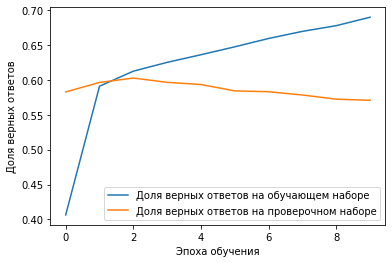

In [ ]:
def model_emb():
  model = Sequential()
  model.add(Embedding(maxWordscount, 40, input_length=xlen))
  model.add(SpatialDropout1D(0.2))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(200, activation='relu'))
  model.add(Dropout(0.25))
  model.add(BatchNormalization())
  model.add(Dense((classesEnc.max()+1), activation='softmax'))
  model.compile(optimizer='adam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model
model = model_emb()
history = model.fit(xtrain_E, ytrain_E, 
                      epochs=10,
                      batch_size=64,
                      validation_data=(xval_E,yval_E) )
list_pro2 += [['model_HW_E', round(history.history['accuracy'][len(history.history['accuracy'])-1], 3),\
          round(history.history['val_accuracy'][len(history.history['val_accuracy'])-1], 3)]]
plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')

In [ ]:
list_pro2

[['model_HW_E', 0.69, 0.573],
 ['model_HW', 0.942, 0.897],
 ['model_HW_twolayers', 0.961, 0.919],
 ['model_lesson', 0.997, 0.686],
 ['model_lesson_E', 1.0, 0.325]]

In [ ]:
# Напишите функцию распознавания нужного обращения разделением его на фрагменты и распознаванием фрагментов.

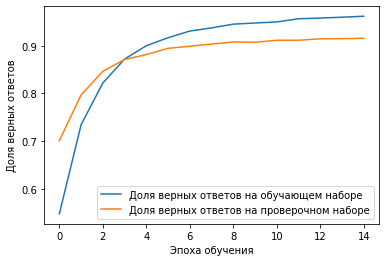

In [ ]:
def model_22():
  #Создаём полносвязную сеть
  model01 = Sequential()
  #Первый полносвязный слой
  model01.add(Dense(324, input_dim=MaxWordsCount, activation="relu"))
  #Слой регуляризации Dropout
  model01.add(Dropout(0.25))
  #Слой пакетной нормализации
  model01.add(BatchNormalization())
  model01.add(Dense(96, input_dim=MaxWordsCount, activation="relu"))
  #Слой регуляризации Dropout
  model01.add(Dropout(0.2))
  #Слой пакетной нормализации
  model01.add(BatchNormalization())
  #Слой пакетной нормализации
  model01.add(BatchNormalization())
  #Выходной полносвязный слой
  model01.add(Dense(6, activation='sigmoid'))

  model01.compile(optimizer='nadam', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
  return model01
model = model_22()
history = model.fit(xtrain_, ytrain_, 
                      epochs=15,
                      batch_size=64, verbose = False,
                      validation_data= (xval_,yval_))

plot_(history = history, acc = 'accuracy', vacc = 'val_accuracy')


In [ ]:
classname = {2:'ЖКХ', 3:'Здравоохранение'}
classname_ = list(encoder.classes_)
#text_internet - парсинг ЖКХ, здравоохранения см. ниже (2,3 категория)
texts_int = text_internet.text.values  
Classes_int = list(text_internet.category.values)

#I
tokenizer1 = Tokenizer(num_words=100, oov_token = 'unknown', split=' ', char_level = False)

#II
# "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
tokenizer1.fit_on_texts(texts_int)
#III
trainIndex11 = tokenizer1.texts_to_sequences(texts_int)

xlen = 10
step = 2

#Заново проходимся по тестовой выборке, создавая много примеров с xlen, step
#Заново тестовую запихиваем в bag of wards
def createTestmultiClasses(wordIndex, xlen, step):
  nClasses = len(wordIndex)
  xTest6Clas01 = []
  xTest6Clas = []
  for wi in wordIndex:
    sample = (getsetfromInd(wi, xlen, step))
    xTest6Clas.append(sample)
    xTest6Clas01.append(tokenizer.sequences_to_matrix(sample))
  xTest6Clas01 = np.array(xTest6Clas01)                     #И добавляется к нашему списку, 
  xTest6Clas = np.array(xTest6Clas)   
  return xTest6Clas01, xTest6Clas

#Используем свою обученную модель, обработанный текст в bag of wards
#Делаем предсказание на текст
nClasses = classesEnc.max()+1 
def recognizemulticlas(model, xtest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
#Когда идем по классам и предсказываем, то по отдельным частям могут быть совпадения на другие тексты,
#Поэтому мы предсказывем весь текст у одного автора и подсчитываем сколько было уникальных от этого
#автора своего текста.
  totalSum = 0
  sumCount = 0
  #получается в currout будут от одного автора сколько его и сколько возможно другого текста на совпадение
  for i in range(len(xtest)):
    print('i',i)
    currpred = model.predict(xtest[i])
    currout = np.argmax(currpred, axis=1)

    #Обобщаем к одному автору, и подсчет общего числа в одном авторе нескольких текстов, которые могут совпадать с другими
    evval = []
    for j in range(nClasses):
      evval.append(len(currout[currout==j])/ len(xtest[i]))

    #сколько в общем по всем авторам получилось предсказать, при котором складывание идет в долях от определенного автора
    totalSum += len(currout[currout==Classes_int[i]])

    #Выбираем уже из обощенной информации по определенному автору максимаьную долю совпадения
    recogClass = np.argmax(evval)
    isrecogClass = 'Не прав ответ'
    if (recogClass == Classes_int[i]):
      isrecogClass = 'Правиль ответ'
    str1 = 'Класс: ' + classname[Classes_int[i]] + " " * (21 - len(classname[Classes_int[i]])) + str(int(100*evval[Classes_int[i]])) + "% сеть отнесла к классу " + classname_[recogClass]
    print(str1, " " * (55-len(str1)), ' ', isrecogClass, sep='')

    sumCount += len(currout)
  
  # Выводим средний процент распознавания по всем классам вместе
  print()

  print("Средний процент распознавания ", int(100*totalSum/sumCount), "%", sep='')

  print()
  
  return totalSum/sumCount


xTest6Classes01, x2 = createTestmultiClasses(trainIndex11, xlen, step) #Преобразование тестовой выборки
# l = np.array(xTest6Classes01)
# np.save('xTestPredictBoW', l)
# np.save('xTestPredictEmbedding', x2)

pred = recognizemulticlas(model, xTest6Classes01, "Тексты_интернет")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


НЕЙРОНКА:  Тексты_интернет

i 0
Класс: ЖКХ                  21% сеть отнесла к классу Здравоохранение Не прав ответ
i 1
Класс: ЖКХ                  15% сеть отнесла к классу Здравоохранение Не прав ответ
i 2
Класс: ЖКХ                  41% сеть отнесла к классу ЖКХ Правиль ответ
i 3
Класс: ЖКХ                  19% сеть отнесла к классу Здравоохранение Не прав ответ
i 4
Класс: ЖКХ                  12% сеть отнесла к классу Здравоохранение Не прав ответ
i 5
Класс: ЖКХ                  40% сеть отнесла к классу ЖКХ Правиль ответ
i 6
Класс: ЖКХ                  30% сеть отнесла к классу Здравоохранение Не прав ответ
i 7
Класс: ЖКХ                  26% сеть отнесла к классу Здравоохранение Не прав ответ
i 8
Класс: ЖКХ                  32% сеть отнесла к классу Здравоохранение Не прав ответ
i 9
Класс: ЖКХ                  50% сеть отнесла к классу ЖКХ Правиль ответ
i 10
Класс: ЖКХ                  64% сеть отнесла к классу ЖКХ Правиль ответ
i 11
Класс: ЖКХ                  31% сеть отнесла к

# Парсинг ЖКХ, Здравоохранение

In [ ]:
import requests #Импортируем для формирования запрсов в Интернет 
from bs4 import BeautifulSoup #Для парсинга 
import pandas as pd #Для преобразования данных в удобный для просмотра вид 
import datetime #Для подсчета времени 
import csv #Для работы с csv
import urllib.request as urllib2 
from tqdm.notebook import tqdm

url = 'https://roskvartal.ru'
pages = 16
dict_ = {}
list_ = []
dict_['ЖКХ'] = []
for p in range(1,pages+1):
  r = requests.get('https://roskvartal.ru/pro-zhkh/gis-zhkh/',params = {'':p}) #Формируем запрос 
  print(r)
  soup = BeautifulSoup(r.text) #Парсим полученный html
  print(p)
  temps = soup.findAll('h2', {'class':"discussion-title"}) #Находим все блоки с матчами
  print(temps)
  for cell in tqdm(temps):
    y=cell.find('a').get('href')
    url = "https://roskvartal.ru" + y
    page = urllib2.urlopen(url)
    soups = BeautifulSoup(page.read())
    list_ += [soups.find('div', {'class':'comment-body'}).text]
dict_['ЖКХ'] = list_
base = pd.DataFrame(list_)
base.to_csv('/content/drive/MyDrive/HW17/JKX.csv', index=None)

((57362, 20), (57362, 6))

In [ ]:
JKX = pd.read_csv('/content/drive/MyDrive/HW17/JKX.csv', names = ['text'])
JKX = JKX.loc[1:477]
JKX= JKX.reset_index()
JKX['category'] = 2

In [ ]:
pages = 102
dict_ = {}
list_ = []
# dict_[''] = []
for p in range(1,pages+1):
  r = requests.get('http://vopros-otvet.avo.ru/viewforum.php?id=16', params = {'&p=': p}) #Формируем запрос 
  # print(r)
  soup = BeautifulSoup(r.text) #Парсим полученный html
  # print(p)
  temps = soup.findAll('h3', {'class':"hn"}) #Находим все блоки с матчами
  # print(temps)
  for cell in tqdm(temps):
    y=cell.find('a').get('href')
    req = requests.get(y) #Формируем запрос 
    soups = BeautifulSoup(req.text)
    temp = soups.find('div', {'class':'entry-content'}).text
    list_ += [temp.replace('\n', '')]
d = pd.DataFrame(list_)
d.to_csv('/content/drive/MyDrive/HW17/Health.csv', index=None)

In [ ]:
health_care = pd.read_csv('/content/drive/MyDrive/HW17/Health.csv', names = ['text'])
health_care = health_care.loc[1:477]
health_care = health_care.reset_index()
health_care['category'] = 3
health_care

,index,text,category
0,1,Добрый день! Как получить путевку в санаторий ...,3
1,2,Добрый день.Для получения консультативной помо...,3
2,3,Добрый день.Согласно постановлению Правительст...,3
3,4,я заболела 10.12.20г поставили диагноз ОРВИ.Со...,3
4,5,08.12.20 была записана через сайт Госуслуги на...,3
...,...,...,...
472,473,Добрый день. Скажите куда жаловаться на долгий...,3
473,474,В детской поликлинике в г. Гусь-Хрустальном от...,3
474,475,Здравствуйте! Вопрос безотлагательный. Мою род...,3
475,476,Невозможно попасть ко врачу в первой городской...,3


In [ ]:
text_internet = pd.concat([JKX, health_care])
text_internet = text_internet.reset_index()
text_internet.drop(['level_0', 'index'], axis = 1, inplace = True)

In [ ]:
text_internet.to_csv('/content/drive/MyDrive/HW17/textinternet.csv')

In [ ]:
text_internet['count'] = 1
for i in range(text_internet.shape[0]):
  text_internet.iat[i,2] = len(text_internet.iloc[i].text.split())

In [ ]:
#Так как количество слов в выборке имеется от 8 (слов), то сделаем
#фильтр, где выберем строчки > 20 слов в опросе
text_internet = text_internet.loc[text_internet['count'] > 20].reset_index().drop(['index'],axis=1)

In [ ]:
text_internet

,text,category,count
0,Добрый день) внесла информацию о размере платы...,2,36
1,Договора - РСО с УК по КР на СОИ / ОДН (в рамк...,2,79
2,Федеральным законом от 25.05.2020 № 156-ФЗ «О ...,2,63
3,"У нас есть платежный агент расчетный центр, но...",2,50
4,Между собственниками МКД и РСО заключены прямы...,2,26
...,...,...,...
753,Добрый день. Скажите куда жаловаться на долгий...,3,33
754,В детской поликлинике в г. Гусь-Хрустальном от...,3,149
755,Здравствуйте! Вопрос безотлагательный. Мою род...,3,99
756,Невозможно попасть ко врачу в первой городской...,3,144


# Попробуйте разные параметры фильтрации выборки. Добавьте какой-нибудь свой критерий для фильтрации.

In [ ]:
# !pip install pymorphy2
import pymorphy2
from tqdm.notebook import tqdm
morph = pymorphy2.MorphAnalyzer()
array_int = []

def delete_signs(text,*d):
  for i in d:
    text = text.replace(i, ' ')
  return text

texts_int = text_internet.text.values  
for cel in tqdm(texts_int):
  cel = delete_signs(cel, '.', ',', '(', ')', '!', '?', '\xa0', '  ')
  
  str_ = ''
  
  for i in cel.split():
    str_ += morph.parse(i)[0].normal_form + ' '
    
  array_int.append()


['добрый день внести информация о размер плата за содерание жильё и текущий ремонт ереза договор управление пытаться загрузить платёжный документ но не видеть внести я дать или так же сутки пройти должный с мрмент внесени изменение ',
 'договор - рсо с ук по кр на соя / одн в рамка водоснабжение данный вид договор необходимый для размещение в гис жкх кто он должный размещаться рсо или ук и в какой случаях: если дом на управление или с выбрать прямой договор -исполнитель являться ук она ведь вноситься как жилищный услуга в рамка договор управление а при временной ук например - прямой договор мкд исполнитель рсо и быть выставиться одн как правильно понимать ответственный за размещение данные ',
 'федеральный закон от 25 05 2020 № 156-фз «о внесение изменение в жилищный кодекс российский федерация и отдельный законодательный акт российский федерации» быть разрешить проводить заочный собрание собственник через информационный система даже если она не быть выбрать инструмент для проведение о

In [ ]:
array_int = np.array(array_int)

In [ ]:
classname = {2:'ЖКХ', 3:'Здравоохранение'}
classname_ = list(encoder.classes_)
#text_internet - парсинг ЖКХ, здравоохранения см. ниже (2,3 категория)
texts_int = array_int 
Classes_int = list(text_internet.category.values)

#I
tokenizer1 = Tokenizer(num_words=100, oov_token = 'unknown', split=' ', char_level = False)

#II
# "Скармливаем" наши тексты, т.е. даём в обработку методу, который соберет словарь частотности
tokenizer1.fit_on_texts(texts_int)
#III
trainIndex11 = tokenizer1.texts_to_sequences(texts_int)

xlen = 6
step = 2

#Заново проходимся по тестовой выборке, создавая много примеров с xlen, step
#Заново тестовую запихиваем в bag of wards
def createTestmultiClasses(wordIndex, xlen, step):
  nClasses = len(wordIndex)
  xTest6Clas01 = []
  xTest6Clas = []
  for wi in wordIndex:
    sample = (getsetfromInd(wi, xlen, step))
    xTest6Clas.append(sample)
    xTest6Clas01.append(tokenizer.sequences_to_matrix(sample))
  xTest6Clas01 = np.array(xTest6Clas01)                     #И добавляется к нашему списку, 
  xTest6Clas = np.array(xTest6Clas)   
  return xTest6Clas01, xTest6Clas

#Используем свою обученную модель, обработанный текст в bag of wards
#Делаем предсказание на текст
nClasses = classesEnc.max()+1 
def recognizemulticlas(model, xtest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
#Когда идем по классам и предсказываем, то по отдельным частям могут быть совпадения на другие тексты,
#Поэтому мы предсказывем весь текст у одного автора и подсчитываем сколько было уникальных от этого
#автора своего текста.
  totalSum = 0
  sumCount = 0
  #получается в currout будут от одного автора сколько его и сколько возможно другого текста на совпадение
  for i in range(len(xtest)):
    print('i',i)
    currpred = model.predict(xtest[i])
    currout = np.argmax(currpred, axis=1)

    #Обобщаем к одному автору, и подсчет общего числа в одном авторе нескольких текстов, которые могут совпадать с другими
    evval = []
    for j in range(nClasses):
      evval.append(len(currout[currout==j])/ len(xtest[i]))

    #сколько в общем по всем авторам получилось предсказать, при котором складывание идет в долях от определенного автора
    totalSum += len(currout[currout==Classes_int[i]])

    #Выбираем уже из обощенной информации по определенному автору максимаьную долю совпадения
    recogClass = np.argmax(evval)
    isrecogClass = 'Не прав ответ'
    if (recogClass == Classes_int[i]):
      isrecogClass = 'Правиль ответ'
    str1 = 'Класс: ' + classname[Classes_int[i]] + " " * (21 - len(classname[Classes_int[i]])) + str(int(100*evval[Classes_int[i]])) + "% сеть отнесла к классу " + classname_[recogClass]
    print(str1, " " * (55-len(str1)), ' ', isrecogClass, sep='')

    sumCount += len(currout)
  
  # Выводим средний процент распознавания по всем классам вместе
  print()

  print("Средний процент распознавания ", int(100*totalSum/sumCount), "%", sep='')

  print()
  
  return totalSum/sumCount


xTest6Classes01, x2 = createTestmultiClasses(trainIndex11, xlen, step) #Преобразование тестовой выборки
# l = np.array(xTest6Classes01)
# np.save('xTestPredictBoW', l)
# np.save('xTestPredictEmbedding', x2)

pred = recognizemulticlas(model, xTest6Classes01, "Тексты_интернет")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


НЕЙРОНКА:  Тексты_интернет

i 0
Класс: ЖКХ                  25% сеть отнесла к классу ЖКХ Правиль ответ
i 1
Класс: ЖКХ                  28% сеть отнесла к классу ЖКХ Правиль ответ
i 2
Класс: ЖКХ                  38% сеть отнесла к классу Здравоохранение Не прав ответ
i 3
Класс: ЖКХ                  39% сеть отнесла к классу Здравоохранение Не прав ответ
i 4
Класс: ЖКХ                  30% сеть отнесла к классу Здравоохранение Не прав ответ
i 5
Класс: ЖКХ                  34% сеть отнесла к классу Здравоохранение Не прав ответ
i 6
Класс: ЖКХ                  60% сеть отнесла к классу ЖКХ Правиль ответ
i 7
Класс: ЖКХ                  41% сеть отнесла к классу ЖКХ Правиль ответ
i 8
Класс: ЖКХ                  61% сеть отнесла к классу ЖКХ Правиль ответ
i 9
Класс: ЖКХ                  50% сеть отнесла к классу ЖКХ Правиль ответ
i 10
Класс: ЖКХ                  31% сеть отнесла к классу Здравоохранение Не прав ответ
i 11
Класс: ЖКХ                  38% сеть отнесла к классу ЖКХ Правиль отве

ВЫВОД:

1) Работа с отзывами сложна тем, что это разговорный язык, поэтому много сокращений и ошибок в словах. Поэтому необходимо слова преобразовать в начальную форму. Также перед этим убать все знаки препинания. Также можно, скачав проверенный словарь, реализовать алгоритм через расстояние Левенштейна для возмещения сокращенных слов и в основном опечаток.

2) Усовершенствовать алгоритм можно, если поиграться с шагом и длиной окна. В итоге получается, если текст не короткий (от 20), то лучше всего шаг делать 2, а длину окна 6.

3) Через embbeding модель показала большую ошибку и переобучение
